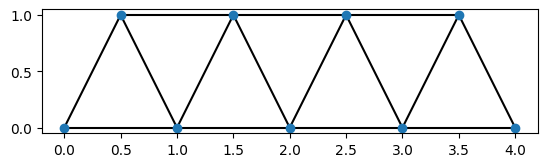

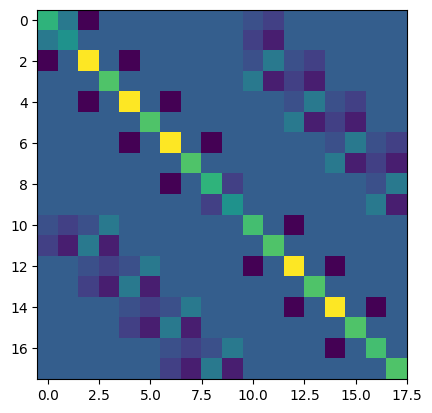

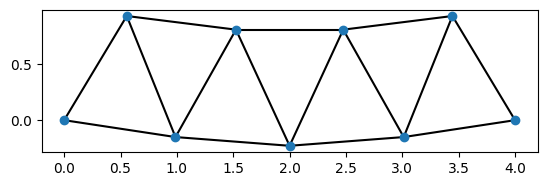

In [2]:
import numpy as np
import matplotlib.pyplot as plt

E = 210e9  # Pa
g = 9.81  # m/s^2
rho = 7850  # kg/m^3
A = 18e-3  # m^2

points = np.array([
    (0,0),(1,0),(2,0),(3,0),
    (4,0),(0.5,1),(1.5,1),(2.5,1),
    (3.5,1)
])

dt = np.dtype([("i1",np.int32),("i2",np.int32),("A",np.float64)])
elements = np.array([
    (0,1,A),(1,2,A),(2,3,A),(3,4,A),
    (5,6,A),(6,7,A),(7,8,A),(0,5,A),
    (5,1,A),(1,6,A),(6,2,A),(2,7,A),
    (7,3,A),(3,8,A),(8,4,A)
],dtype=dt)

def plot_beams(p, e):
    for el in e:
        plt.plot(
            [p[el['i1'],0],p[el['i2'],0]],
            [p[el['i1'],1],p[el['i2'],1]],
        'k-')
    plt.plot(p[:,0], p[:,1],"o")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

plot_beams(points, elements)

dofs = points.size
S = np.zeros((dofs, dofs))
RHS = np.zeros(dofs)

for el in elements:
    local_dof = np.array([2*el['i1'], 2*el['i1']+1, 2*el['i2'], 2*el['i2']+1])
    n = points[el['i2']] - points[el['i1']]
    L = np.sqrt(n.dot(n))
    n = n / L
    N = np.array([[-n[0], -n[1], n[0], n[1]]])
    local_S = np.dot(N.T, np.dot(A*E/L, N))
    S[np.ix_(local_dof, local_dof)] += local_S
    local_load = np.array([0, -0.5, 0, -0.5]) * g * A * L * rho
    RHS[local_dof] += local_load

total_weight = np.sum(RHS)

plt.imshow(S)
plt.show()

to_load = np.array([2*2+1])
load = -1e3 * g  # 1 tonne
RHS[to_load] = load

to_fix = np.array([2*0+0, 2*0+1, 2*4+0, 2*4+1])
S[to_fix, :] = np.eye(dofs)[to_fix, :]
RHS[to_fix] = 0

x = np.linalg.solve(S, RHS)
displacement = np.reshape(x, points.shape)

scale = 10000
plot_beams(points + scale * displacement, elements)


